# 491 递增子序列
输入： 整数数组  
输出：该数组所有的递增子序列，子序列长度至少为2

ps：  
- 给定数组的长度不会超过15。  
- 数组中的整数范围是 [-100,100]。  
- 给定数组中可能包含重复数字，相等的数字应该被视为递增的一种情况  

## 思路
本题也不能够取相同的子集：子集 + 去重  

注意：这题中是不能把原数组排序的！因为每个子集中的元素也要保持和原数组中一致的相对位置   
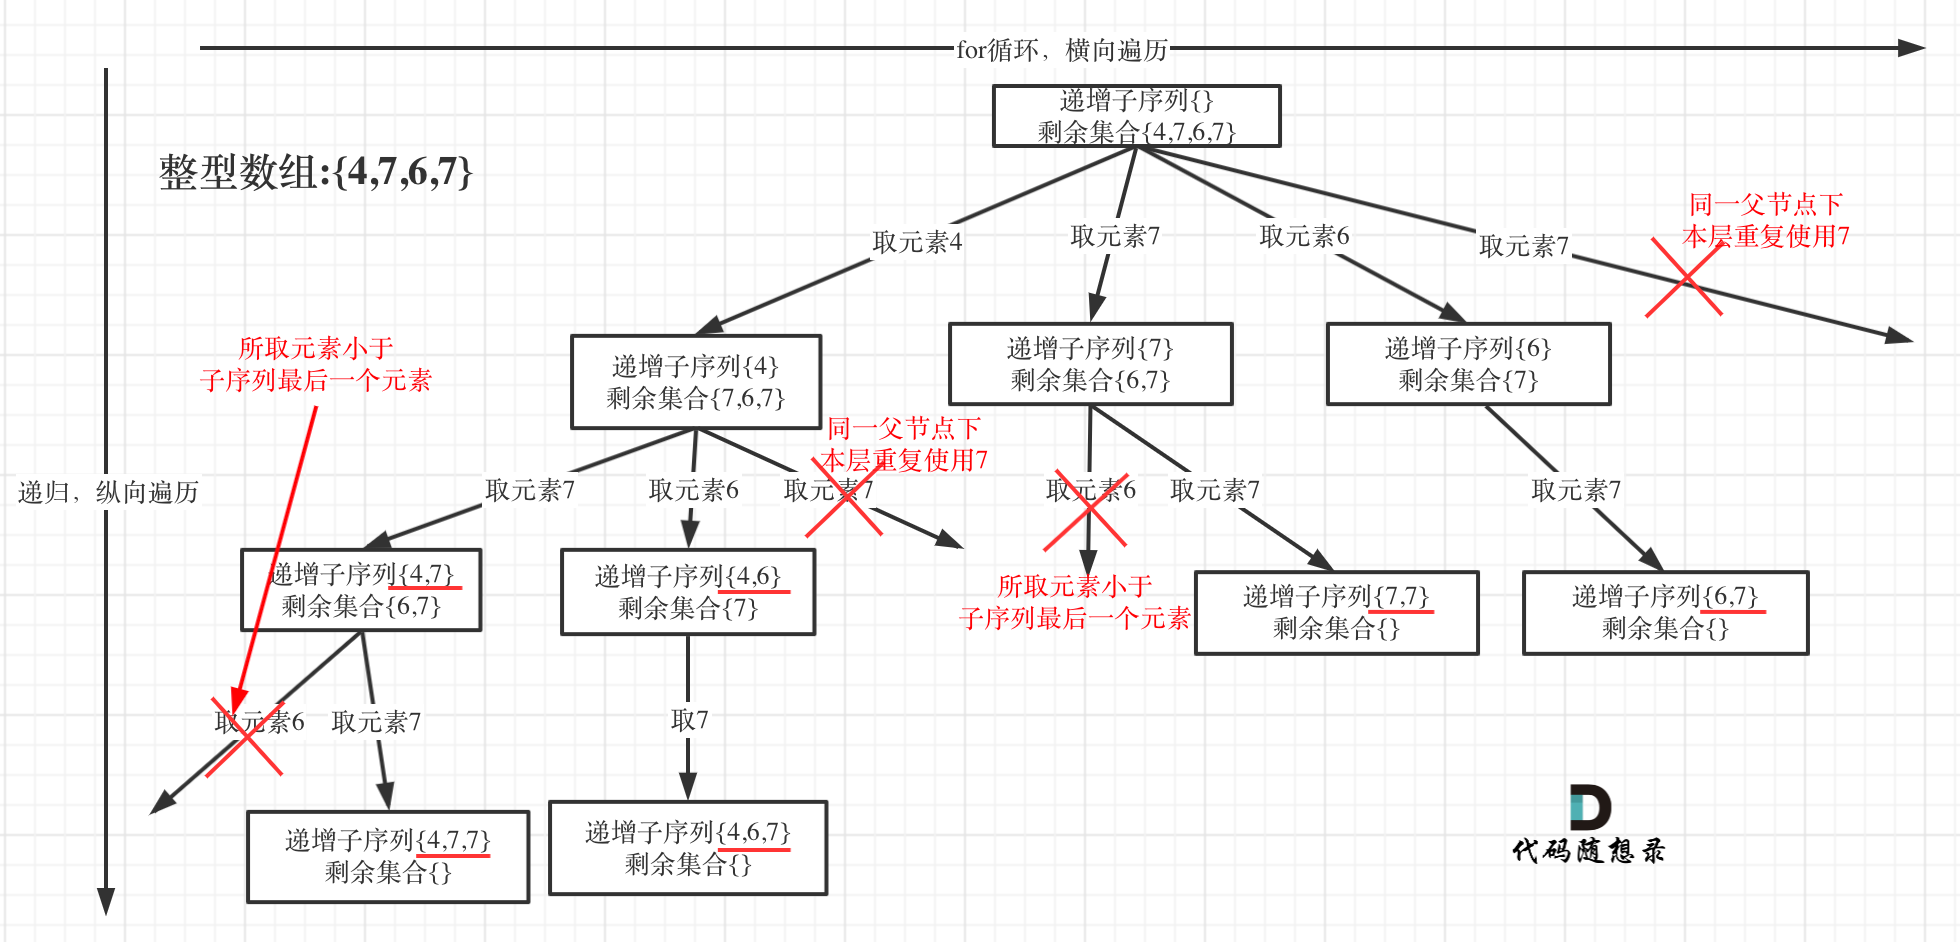

### 回溯三部曲
1. 递归函数参数
   - 求子集的过程中一个元素在同一树层中取过就不可以重复使用了
   - 所以需要startIndex：标记下一层递归的起始位置
   - 全局参数还是：记录当前子集的数组path，和接过数组reseult

2. 终止条件：
   - 求所有子集所以整棵树都需要遍历。可以不加终止条件  
   - 但每次递归搜集的子序列长度必须 >= 2

3. 单层递归逻辑
   - 单个新元素加入path时要先判断是否大于当前path的最后一个元素（保持递增）  
   - 下一次递归需要从当前元素的下一个开始（不能重复使用）


时间复杂度: O(n * 2^n)  
空间复杂度: O(n)

In [ ]:
# 使用集合去重

class Solution:
    def findSubsequence(self, nums):
        result = []
        path = []
        self.backtracing(nums, 0, path, result)
        return result

    def backtracing(sefl, nums, startIndex, path, result):
        if len(path) > 1:
            result.append(path[:])     # 把当前路径副本加入result‘
            # 这里还不能result！因为要遍历的是节点不是边
        
        used_set = set()   # 标记本层元素中使用过的元素,每次for循环开始前都会清空（每层使用一个used_set）
        for i in range(startIndex, len(nums)):
            if (path and nums[i] < path[-1]) or nums[i] in used_set:
                # 当前元素不符合path递增，或者当前元素在本层已经被使用过了
                continue
                
            used_set.add(nums[i])   # 当前元素标记已使用
            path.append(nums[i])
            self.backtracing(nums, i+1, path, result)
            path.pop()
            # used_set不用单独清空了
        